In [1]:
#import library yang dibutuhkan
import requests #request untuk download
from bs4 import BeautifulSoup #beautiful soup untuk scrapping
import pandas as pd #untuk mengolah data lebih mudah melalui tipe dataframe
import os, json, cv2, random
from google.colab.patches import cv2_imshow

url = "https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2499334.m570.l1313&_nkw=baju&_sacat=0" #url yang dipakai
response = requests.request("GET",url) #meretrieve response dari web melalui url

data = BeautifulSoup(response.text,'html.parser')  #parsing data dengan menggunakan html parser
images = data.find_all('img',src=True) #cari semua tag image
print(images)

[<img alt="eBay Logo" height="200" id="gh-logo" src="https://ir.ebaystatic.com/rs/v/fxxj3ttftm5ltcqnto1o4baovyl.png" style="clip:rect(47px, 118px, 95px, 0px); position:absolute; top:-47px;left:0" width="250"/>, <img importance="high" src="https://i.ebayimg.com/thumbs/images/g/HEcAAOSwKcxflrpn/s-l225.jpg"/>, <img importance="high" src="https://i.ebayimg.com/thumbs/images/g/n4IAAOSw5W5a8gyw/s-l225.jpg"/>, <img importance="high" src="https://i.ebayimg.com/thumbs/images/g/amgAAOSwhzRahZNO/s-l225.jpg"/>, <img importance="high" src="https://i.ebayimg.com/thumbs/images/g/w0kAAOSwkudhBMkd/s-l225.jpg"/>, <img importance="high" src="https://i.ebayimg.com/thumbs/images/g/sBYAAOSw0bJg47vR/s-l225.jpg"/>, <img importance="high" src="https://i.ebayimg.com/thumbs/images/g/eRwAAOSwHqVgCClf/s-l225.jpg"/>, <img importance="high" src="https://i.ebayimg.com/thumbs/images/g/nNQAAOSwrjtco4dw/s-l225.jpg"/>, <img importance="high" src="https://i.ebayimg.com/thumbs/images/g/oxwAAOSwOM5eZmKX/s-l225.jpg"/>, <img 

In [2]:
#mendapatkan url image dari sintaks img src
image_src = [x['src'] for x in images]
image_src_jpg = [x for x in image_src if x.endswith('.jpg')]
image_src_png = [x for x in image_src if x.endswith('.png')]

result_png = []
result_jpg = []

for image in image_src_jpg:
    result_jpg.append(image)

for image in image_src_png:
    result_png.append(image)

print(result_png)
print(result_jpg)

['https://ir.ebaystatic.com/rs/v/fxxj3ttftm5ltcqnto1o4baovyl.png']
['https://i.ebayimg.com/thumbs/images/g/HEcAAOSwKcxflrpn/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/n4IAAOSw5W5a8gyw/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/amgAAOSwhzRahZNO/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/w0kAAOSwkudhBMkd/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/sBYAAOSw0bJg47vR/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/eRwAAOSwHqVgCClf/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/nNQAAOSwrjtco4dw/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/oxwAAOSwOM5eZmKX/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/aKIAAOSwkl5Xcv2n/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/Qy0AAOSw5Ppf9RJ6/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/HEcAAOSwKcxflrpn/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/n4IAAOSw5W5a8gyw/s-l225.jpg', 'https://i.ebayimg.com/thumbs/images/g/amgAAOSwhzRahZNO/s-l225.jpg', 'https://i.ebayimg.com/thumbs/image

In [3]:
def download(input, path, general_name, ext):
  
  for x in range(len(input)):
    file_name = path + general_name + str(x) + ext
    file_url = input[x]

    !wget --no-check-certificate \
      '$file_url' \
      -O '$file_name'

In [4]:
!mkdir dataset

In [5]:
download( result_jpg, "/content/dataset/", "baju_", ".jpg")

--2021-11-03 09:35:40--  https://i.ebayimg.com/thumbs/images/g/HEcAAOSwKcxflrpn/s-l225.jpg
Resolving i.ebayimg.com (i.ebayimg.com)... 151.101.2.206, 151.101.66.206, 151.101.130.206, ...
Connecting to i.ebayimg.com (i.ebayimg.com)|151.101.2.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12765 (12K) [image/jpeg]
Saving to: ‘/content/dataset/baju_0.jpg’

/content/dataset/ba 100%[===================>]  12.47K  --.-KB/s    in 0s      

2021-11-03 09:35:40 (58.3 MB/s) - ‘/content/dataset/baju_0.jpg’ saved [12765/12765]

--2021-11-03 09:35:40--  https://i.ebayimg.com/thumbs/images/g/n4IAAOSw5W5a8gyw/s-l225.jpg
Resolving i.ebayimg.com (i.ebayimg.com)... 151.101.2.206, 151.101.66.206, 151.101.130.206, ...
Connecting to i.ebayimg.com (i.ebayimg.com)|151.101.2.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4869 (4.8K) [image/jpeg]
Saving to: ‘/content/dataset/baju_1.jpg’

/content/dataset/ba 100%[===================>]   4.75K  --.-KB/s

In [6]:
 result_jpg

['https://i.ebayimg.com/thumbs/images/g/HEcAAOSwKcxflrpn/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/n4IAAOSw5W5a8gyw/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/amgAAOSwhzRahZNO/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/w0kAAOSwkudhBMkd/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/sBYAAOSw0bJg47vR/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/eRwAAOSwHqVgCClf/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/nNQAAOSwrjtco4dw/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/oxwAAOSwOM5eZmKX/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/aKIAAOSwkl5Xcv2n/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/Qy0AAOSw5Ppf9RJ6/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/HEcAAOSwKcxflrpn/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/n4IAAOSw5W5a8gyw/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/amgAAOSwhzRahZNO/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/w0kAAOSwkudhBMkd/s-l225.jpg',
 'https://i.ebayimg.

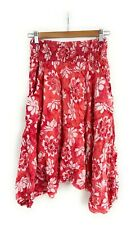

In [7]:
!wget https://i.ebayimg.com/thumbs/images/g/jqIAAOSwSSNgtJfd/s-l225.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)